In [149]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.datasets import make_blobs, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
!pip install -U scikit-activeml
from skactiveml.pool import UncertaintySampling
from skactiveml.utils import unlabeled_indices, MISSING_LABEL
from skactiveml.classifier import SklearnClassifier

In [157]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt

In [237]:
X, y_true = make_blobs(n_samples=2000, centers=2)

In [308]:
iris = load_iris()
X = iris.data[:, :4]
y_true = np.array(iris.target, dtype=int)

In [443]:
y = np.full(shape=y_true.shape, fill_value=MISSING_LABEL)

# Use the first 10 instances as initial training data.
# y[:10] = y_true[:10]

# Create classifier and query strategy.
clf = SklearnClassifier(
    # SGDClassifier(loss='log_loss', alpha=1e-18, random_state=0), #scaler?
    make_pipeline(StandardScaler(),
                  SGDClassifier(loss='log_loss', alpha=1e-18, random_state=0)),
    # GaussianProcessClassifier(),
    classes=np.unique(y_true),
    random_state=0
)
qs = UncertaintySampling(method='entropy')

# Execute active learning cycle.
n_cycles = 10
for c in range(n_cycles):
    query_idx = qs.query(X=X, y=y, clf=clf)
    y[query_idx] = y_true[query_idx]

# Fit final classifier.
clf.fit(X, y)

# print(len(X))
print(clf.score(X, y_true))

0.7


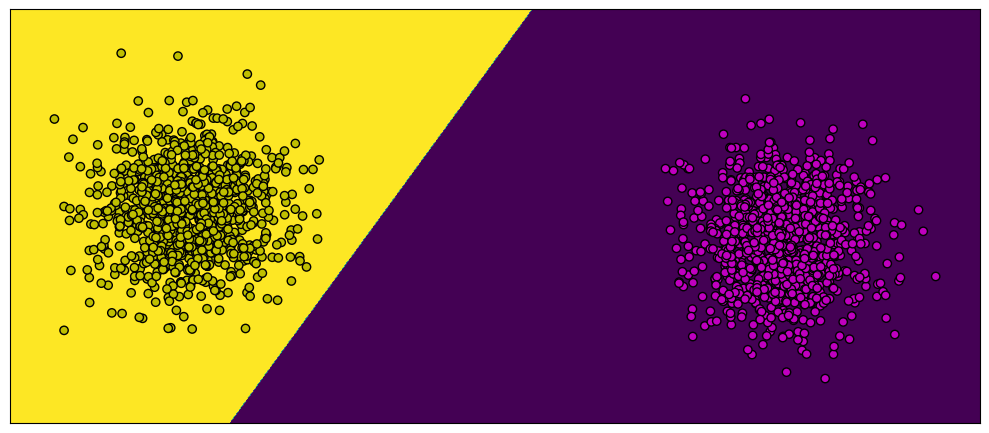

In [306]:
h = 0.02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.figure(figsize=(10, 5))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape((xx.shape[0], xx.shape[1]))
plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=np.array(["m", "y"])[y_true], edgecolors=(0, 0, 0))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
# plt.title(
#     "%s, LML: %.3f" % ('title', clf.log_marginal_likelihood(clf.kernel_.theta))
# )

plt.tight_layout()
plt.show()